In [161]:
# APIs/Packages
import pandas as pd
import seaborn as sns

from tabulate import tabulate
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [162]:
random_state = 42

In [163]:
car_data = pd.read_csv("../data/car-data.csv")

from sklearn.preprocessing import LabelEncoder
le_fuel = LabelEncoder()
le_seller = LabelEncoder()
le_transmission = LabelEncoder()

In [164]:
# Change strings to values (0s, 1s, 2s, etc...)
car_data["le_fuel"] = le_fuel.fit_transform(car_data["Fuel_Type"])
car_data["le_seller"] = le_seller.fit_transform(car_data["Seller_Type"])
car_data["le_transmission"] = le_transmission.fit_transform(car_data["Transmission"])

# Drop previous columns
clean_car_data = car_data.drop(["Fuel_Type", "Seller_Type", "Transmission"], axis='columns')

clean_car_data = clean_car_data[["Car_Name", "Year", "Selling_Price", 
                                 "Present_Price", "Kms_Driven", "le_fuel", 
                                 "le_seller", "le_transmission", "Owner"]]

clean_car_data.rename(columns={"le_fuel": "Fuel_Type", 
                                     "le_seller": "Seller_Type", 
                                     "le_transmission": "Transmission"}, inplace=True)
clean_car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,1,0
297,brio,2015,4.00,5.90,60000,2,0,1,0
298,city,2009,3.35,11.00,87934,2,0,1,0
299,city,2017,11.50,12.50,9000,1,0,1,0


In [165]:
clean_car_data.to_csv("../data/" + "clean_car_data.csv", index=False, header=True)

In [166]:
# Contain x train-test and y train-test
x_train, x_test = train_test_split(clean_car_data, 
                                   train_size=0.80, 
                                   test_size=0.20)

In [167]:
x_train

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
63,fortuner,2015,23.50,35.96,47000,1,0,0,0
236,eon,2016,3.10,4.43,11849,2,0,1,0
120,Bajaj Pulsar RS200,2016,1.05,1.26,5700,2,1,1,0
144,Bajaj Pulsar NS 200,2014,0.60,0.99,25000,2,1,1,0
46,ritz,2013,2.65,4.89,64532,2,0,1,0
...,...,...,...,...,...,...,...,...,...
138,Honda CB Hornet 160R,2016,0.60,0.87,15000,2,1,1,0
210,i10,2012,3.10,4.60,35775,2,0,1,0
208,i20,2017,7.90,8.10,3435,2,0,1,0
219,verna,2012,4.50,9.40,36000,2,0,1,0


In [168]:
x_test

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.60,33988,1,0,1,0
141,Bajaj Avenger 150 street,2016,0.60,0.80,20000,2,1,1,0
108,Royal Enfield Thunder 350,2016,1.20,1.50,18000,2,1,1,0
89,etios g,2014,4.75,6.76,40000,2,0,1,0
5,vitara brezza,2018,9.25,9.83,2071,1,0,1,0
...,...,...,...,...,...,...,...,...,...
128,Honda CB Hornet 160R,2017,0.80,0.87,3000,2,1,1,0
11,ciaz,2015,6.85,10.38,51000,1,0,1,0
73,etios liva,2011,2.65,5.71,43000,2,0,1,0
169,Hero Splender iSmart,2015,0.40,0.54,14000,2,1,1,0


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Car Selling Price Distribution Plot'}, xlabel='Selling_Price', ylabel='Density'>

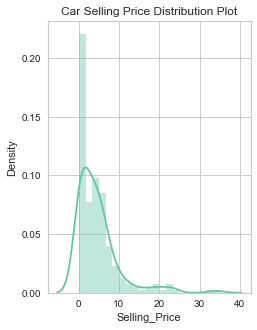

In [169]:
plt.figure(figsize=(8,5))

plt.subplot(1,2,1)
plt.title('Car Selling Price Distribution Plot')
sns.distplot(x_train["Selling_Price"])

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Car Selling Price Distribution Plot'}, xlabel='Selling_Price', ylabel='Density'>

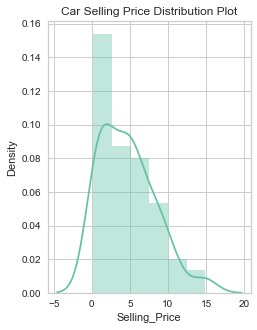

In [170]:
plt.figure(figsize=(8,5))

plt.subplot(1,2,1)
plt.title('Car Selling Price Distribution Plot')
sns.distplot(x_test["Selling_Price"])

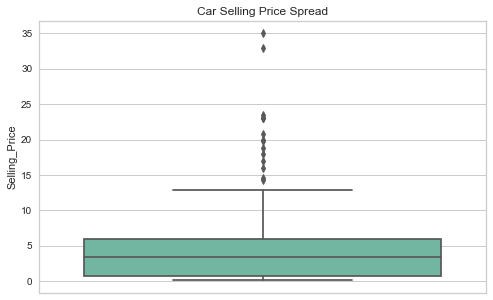

count    240.000000
mean       4.655375
std        5.399894
min        0.100000
25%        0.742500
50%        3.470000
75%        5.912500
max       35.000000
Name: Selling_Price, dtype: float64


In [171]:
plt.figure(figsize=(8,5))

plt.title('Car Selling Price Spread')
sns.boxplot(y=x_train["Selling_Price"])
plt.show()
print(x_train["Selling_Price"].describe())

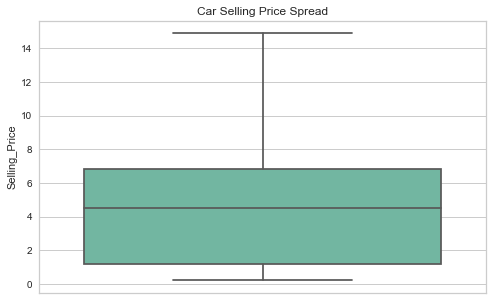

count    61.000000
mean      4.684590
std       3.608977
min       0.200000
25%       1.200000
50%       4.500000
75%       6.850000
max      14.900000
Name: Selling_Price, dtype: float64


In [172]:
plt.figure(figsize=(8,5))

plt.title('Car Selling Price Spread')
sns.boxplot(y=x_test["Selling_Price"])
plt.show()
print(x_test["Selling_Price"].describe())

In [173]:
car_data = clean_car_data

In [174]:
compile_corr_car_data = car_data.corr()
compile_corr_car_data.style.background_gradient(cmap='coolwarm')

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.053643,-0.039896,0.000394,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.509467,-0.550724,-0.367128,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,-0.440415,-0.512030,-0.348715,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,-0.166801,-0.101419,-0.162510,0.089216
Fuel_Type,-0.053643,-0.509467,-0.440415,-0.166801,1.000000,0.352415,0.080466,0.055705
Seller_Type,-0.039896,-0.550724,-0.512030,-0.101419,0.352415,1.000000,0.063240,0.124269
Transmission,0.000394,-0.367128,-0.348715,-0.162510,0.080466,0.063240,1.000000,-0.050316
Owner,-0.182104,-0.088344,0.008057,0.089216,0.055705,0.124269,-0.050316,1.000000


<AxesSubplot:>

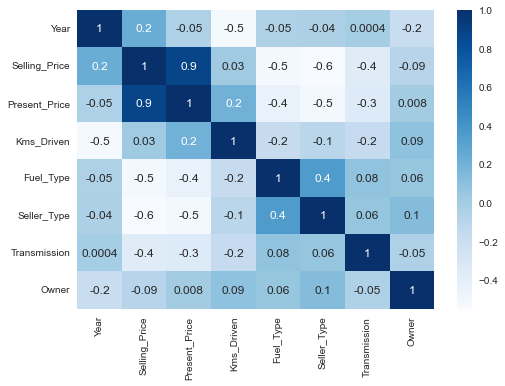

In [175]:
sns.heatmap(compile_corr_car_data, annot=True, cmap="Blues", fmt='.1g')

0.23614098016042737

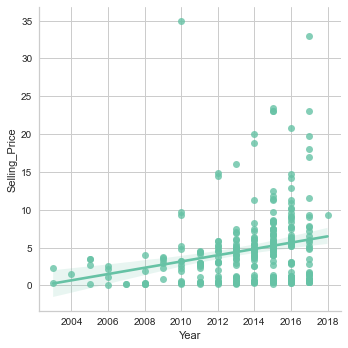

In [176]:
sns.lmplot(x="Year", y="Selling_Price", data=car_data);
car_data["Selling_Price"].corr(car_data["Year"])

0.8789825451614951

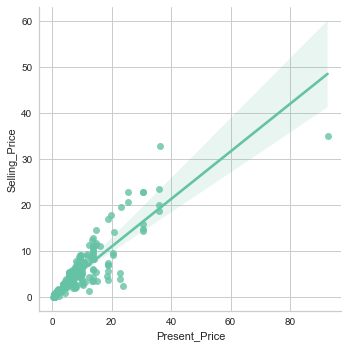

In [177]:
sns.lmplot(x="Present_Price", y="Selling_Price", data=car_data)
car_data["Selling_Price"].corr(car_data["Present_Price"])

0.029187090674291236

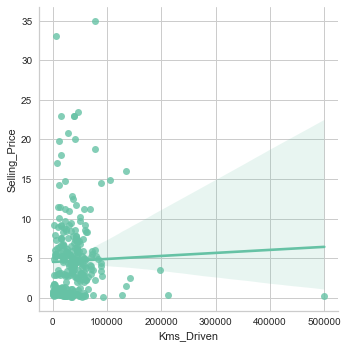

In [178]:
sns.lmplot(x="Kms_Driven", y="Selling_Price", data=car_data)
car_data["Selling_Price"].corr(car_data["Kms_Driven"])

-0.50946725693251

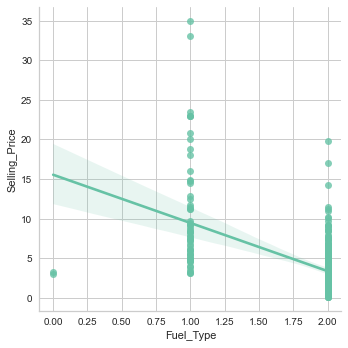

In [179]:
sns.lmplot(x="Fuel_Type", y="Selling_Price", data=car_data)
car_data["Selling_Price"].corr(car_data["Fuel_Type"])

-0.5507237615778758

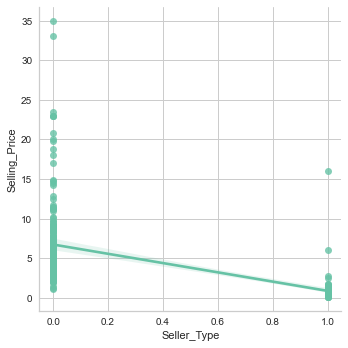

In [180]:
sns.lmplot(x="Seller_Type", y="Selling_Price", data=car_data)
car_data["Selling_Price"].corr(car_data["Seller_Type"])

-0.3671276333090721

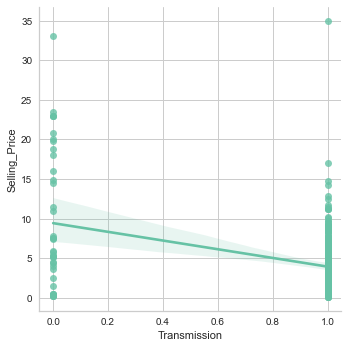

In [181]:
sns.lmplot(x="Transmission", y="Selling_Price", data=car_data)
car_data["Selling_Price"].corr(car_data["Transmission"])

-0.0883440990872023

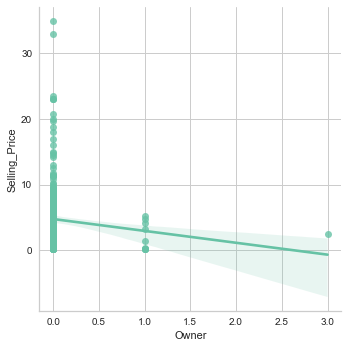

In [182]:
sns.lmplot(x="Owner", y="Selling_Price", data=car_data)
car_data["Selling_Price"].corr(car_data["Owner"])

In [223]:
clean_car_data = clean_car_data.drop("Car_Name", axis=1)

In [319]:
from sklearn.model_selection import train_test_split

x = np.array(clean_car_data["Present_Price"])
y = np.array(clean_car_data["Selling_Price"])

x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y.reshape(-1, 1), 
                                                    train_size = 0.80, 
                                                    test_size = 0.20)

In [320]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression(normalize=True).fit(x_train, y_train)
print(lreg.score(x_train, y_train))
print(lreg.score(x_test, y_test))

0.7775195936234505
0.7078039277239416


D:\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [327]:
np.set_printoptions(suppress=True)
selling_price_predict = lreg.predict(x_test)
selling_price_predict

sidebyside = pd.DataFrame({"Actual": y_test.flatten(), 
                           "Predicted": selling_price_predict.flatten()})
sidebyside

,Actual,Predicted
0,3.49,7.661540
1,0.55,1.168452
2,0.72,1.251966
3,7.50,5.888788
4,0.35,1.933400
...,...,...
56,5.50,4.894817
57,0.35,1.057271
58,5.65,4.812840
59,3.10,3.122066


In [326]:
selling_price_predict

array([[ 7.66153993],
       [ 1.16845207],
       [ 1.2519661 ],
       [ 5.8887881 ],
       [ 1.93339961],
       [10.26430852],
       [ 4.71036925],
       [ 1.6772216 ],
       [10.30017344],
       [ 1.21097762],
       [ 4.91531166],
       [ 1.24684254],
       [ 2.53797972],
       [ 4.24412527],
       [ 2.14346558],
       [ 5.58137448],
       [ 6.93399438],
       [ 5.17661323],
       [ 3.03496506],
       [ 8.39420904],
       [ 1.18843396],
       [ 1.38005511],
       [ 7.73326978],
       [ 1.51839123],
       [ 6.29354935],
       [ 9.00903627],
       [ 4.85382893],
       [ 1.1494949 ],
       [ 1.53376191],
       [ 1.19560694],
       [ 1.0982593 ],
       [ 3.12206558],
       [ 5.58137448],
       [ 2.78903417],
       [ 1.38005511],
       [ 1.19560694],
       [ 1.19560694],
       [ 4.71549281],
       [ 1.2519661 ],
       [ 7.93821218],
       [ 7.16967815],
       [ 1.18843396],
       [ 7.73326978],
       [ 4.65913365],
       [ 4.25949595],
       [ 5

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.846792263132314

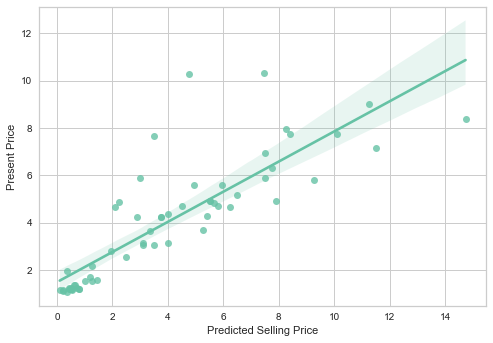

In [328]:
sns.regplot(y_test, selling_price_predict)
plt.xlabel("Predicted Selling Price")
plt.ylabel("Present Price")
plt.show
sidebyside["Predicted"].corr(sidebyside["Actual"])

# CREDIT CARD

In [32]:
# APIs/Packages
import pandas as pd
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

In [33]:
# Uncleaned Data / Initial Data
ini_credit_card_data = pd.read_csv("../data/Credit card.csv")
ini_credit_card_data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [34]:
ini_credit_card_data.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [35]:
# Populate n/a values with its column's mean
cl_mean_value = ini_credit_card_data['CREDIT_LIMIT'].mean()
ini_credit_card_data["CREDIT_LIMIT"] = ini_credit_card_data["CREDIT_LIMIT"].fillna(cl_mean_value)

mp_mean_value = ini_credit_card_data['MINIMUM_PAYMENTS'].mean()
ini_credit_card_data["MINIMUM_PAYMENTS"]=ini_credit_card_data["MINIMUM_PAYMENTS"].fillna(mp_mean_value)

In [36]:
# Drop customer ID as it won't be necessary
credit_card_data = ini_credit_card_data.drop("CUST_ID", axis = 1)
credit_card_data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [37]:
scaler = StandardScaler()
cc_data_scaled = scaler.fit_transform(credit_card_data)
cc_data_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [38]:
K = range(1, 11)
wcss = []
for k in K:
    km = KMeans(n_clusters=k, 
                init="k-means++", 
                random_state=3)
    km.fit(cc_data_scaled)
    wcss.append(km.inertia_)
wcss

[152149.99999999994,
 127784.81000434519,
 111986.18426023598,
 99073.93826774825,
 91502.27452319681,
 84850.39897130549,
 79529.20719265059,
 75569.44343168712,
 71077.69369710945,
 66480.72447208336]

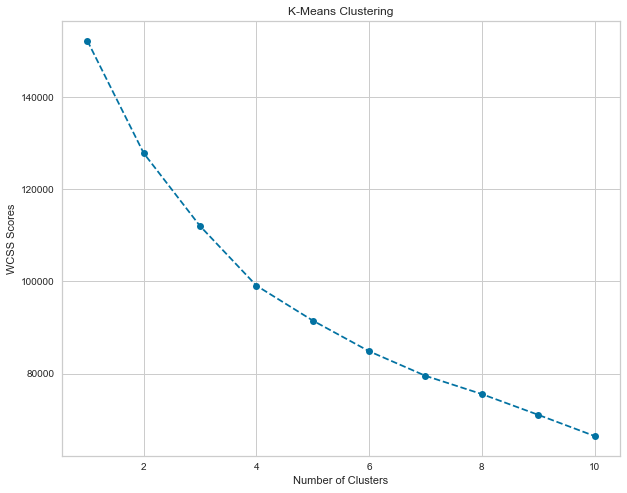

In [39]:
plt.figure(figsize=(10,8))
plt.plot(range(1, 11), wcss,
marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Scores')
plt.title('K-Means Clustering')
plt.show()

In [40]:
for n_clusters in range(2, 11):
    km = KMeans(n_clusters = n_clusters, 
                random_state=3).fit(cc_data_scaled)
    labels = km.labels_
    
    score = silhouette_score(cc_data_scaled, 
                             labels, 
                             metric = "euclidean")
    
    print("For Clusters {}, silhouette score is {}".format(n_clusters, score))

For Clusters 2, silhouette score is 0.20959025073067575
For Clusters 3, silhouette score is 0.25014574505695786
For Clusters 4, silhouette score is 0.1976074492720698
For Clusters 5, silhouette score is 0.19331109052201165
For Clusters 6, silhouette score is 0.2023890033166003
For Clusters 7, silhouette score is 0.21439999318589098
For Clusters 8, silhouette score is 0.20853465664037898
For Clusters 9, silhouette score is 0.2152266443710712
For Clusters 10, silhouette score is 0.22422962620039724


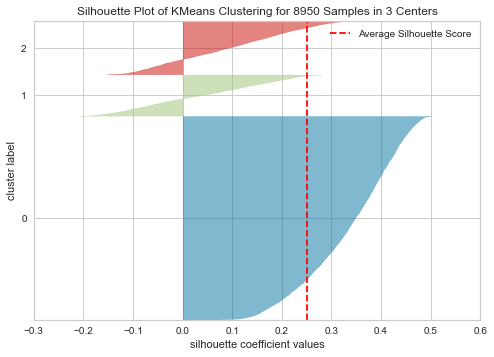

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 8950 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [41]:
km = KMeans (n_clusters = 3)
visuals_plot = SilhouetteVisualizer(km, 
                                    colors="yellowbrick")

visuals_plot.fit(cc_data_scaled)
visuals_plot.poof()

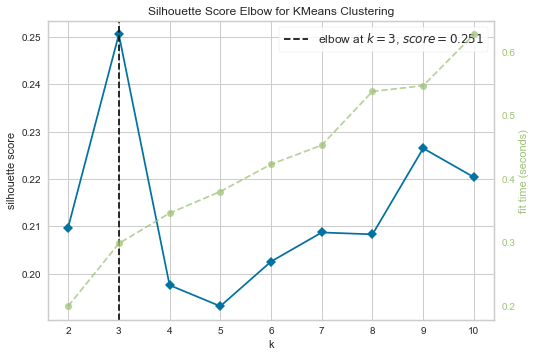

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [42]:
visuals_plot = KElbowVisualizer(km, 
                                k=(2,11),
                                locate_elbow=True,
                                metric = 'silhouette')

visuals_plot.fit(cc_data_scaled)
visuals_plot.poof()

In [144]:
km = KMeans(n_clusters = 3)
km.fit(cc_data_scaled)

KMeans(n_clusters=3)

In [145]:
km_data = credit_card_data.copy()
km_data['KMeans Segment'] = km.labels_
km_data['KMeans Segment']

cc_data_clust = km_data.groupby('KMeans Segment').mean()

# Display columns as index and index as columns for better readability
cc_data_clust_t = cc_data_clust.transpose()
cc_data_clust_t

KMeans Segment,0,1,2
BALANCE,3990.338850,2215.220739,799.302176
BALANCE_FREQUENCY,0.958059,0.981447,0.835161
PURCHASES,386.761982,4271.967762,505.543413
ONEOFF_PURCHASES,248.930119,2721.404972,253.151827
INSTALLMENTS_PURCHASES,137.909206,1551.049408,252.712435
CASH_ADVANCE,3866.619281,455.728015,329.561880
PURCHASES_FREQUENCY,0.233626,0.949145,0.464984
ONEOFF_PURCHASES_FREQUENCY,0.110995,0.668979,0.132341
PURCHASES_INSTALLMENTS_FREQUENCY,0.145639,0.744440,0.345038
CASH_ADVANCE_FREQUENCY,0.446911,0.062710,0.068259


In [151]:
def low_med_high(a, b, c):
    if(a > b and a > c and b > c):
        return ["H", "M", "L"]
    if(a > b and a > c and b < c):
        return ["H", "L", "M"]
    if(b > a and b > c and c > a):
        return ["L", "H", "M"]
    if(b > a and b > c and c < a):
        return ["M", "H", "L"]
    if(c > a and c > b and a > c):
        return ["L", "M", "H"]
    if(c > a and c > b and a < c):
        return ["M", "L", "H"]

counter = 0
format_c = cc_data_clust_t.copy()
for i, row in format_c.iterrows():
    a = cc_data_clust_t[0][counter]
    b = cc_data_clust_t[1][counter]
    c = cc_data_clust_t[2][counter]
    
    lmh_list = low_med_high(a, b, c)

    format_c[0] = format_c[0].replace(format_c[0][counter], lmh_list[0])
    format_c[1] = format_c[1].replace(format_c[1][counter], lmh_list[1])
    format_c[2] = format_c[2].replace(format_c[2][counter], lmh_list[2])
    
    counter += 1
    
format_c



KMeans Segment,0,1,2
BALANCE,H,M,L
BALANCE_FREQUENCY,M,H,L
PURCHASES,L,H,M
ONEOFF_PURCHASES,L,H,M
INSTALLMENTS_PURCHASES,L,H,M
CASH_ADVANCE,H,M,L
PURCHASES_FREQUENCY,L,H,M
ONEOFF_PURCHASES_FREQUENCY,L,H,M
PURCHASES_INSTALLMENTS_FREQUENCY,L,H,M
CASH_ADVANCE_FREQUENCY,H,L,M


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

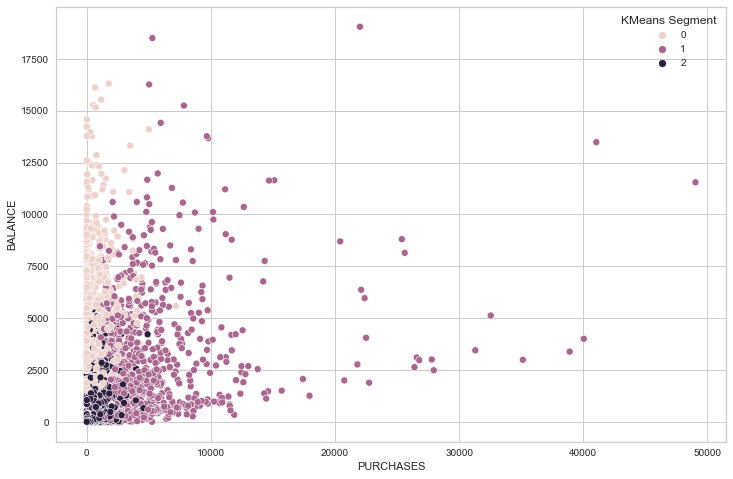

In [126]:
plt.figure(figsize=(12,8))
x = km_data["BALANCE"]
y = km_data["PURCHASES"]
snss = sns.scatterplot(y, x, hue = km_data["KMeans Segment"])
plt.show

In [127]:
ss_cc_data = pd.DataFrame(StandardScaler().fit_transform(credit_card_data), 
                          columns=credit_card_data.columns)
ss_cc_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.360680
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.360680
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.360680
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-4.390474e-16,-0.525551,0.360680
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.486217,-3.498541e-01,1.183951,-4.122768
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.503396,-4.390474e-16,-0.525551,-4.122768
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960433,-0.570615,-3.354655e-01,0.329200,-4.122768
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097856,-0.580536,-3.469065e-01,0.329200,-4.122768


<AxesSubplot:xlabel='BALANCE', ylabel='PURCHASES'>

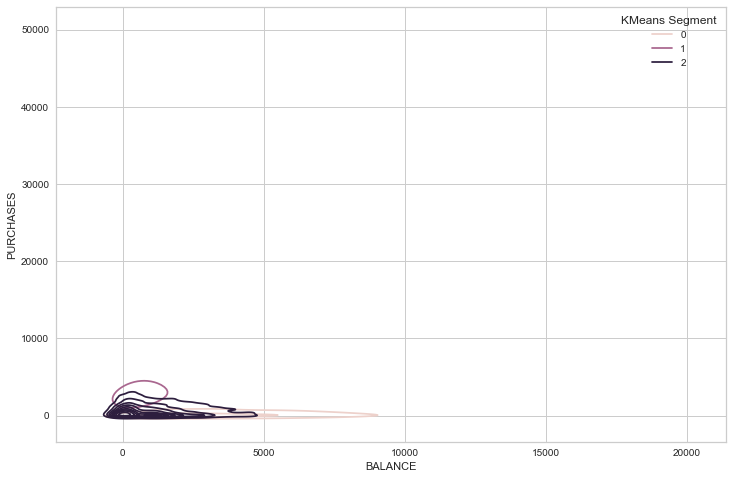

In [128]:
# plt.figure(figsize=(12,8))
# x = ss_cc_data["BALANCE"]
# y = ss_cc_data["PURCHASES"]
# snss = sns.scatterplot(x, y, hue = ss_cc_data["KMeans Segment"])
# plt.show
plt.figure(figsize=(12,8))
sns.kdeplot(data=km_data, x="BALANCE", y="PURCHASES", hue="KMeans Segment")

<AxesSubplot:>

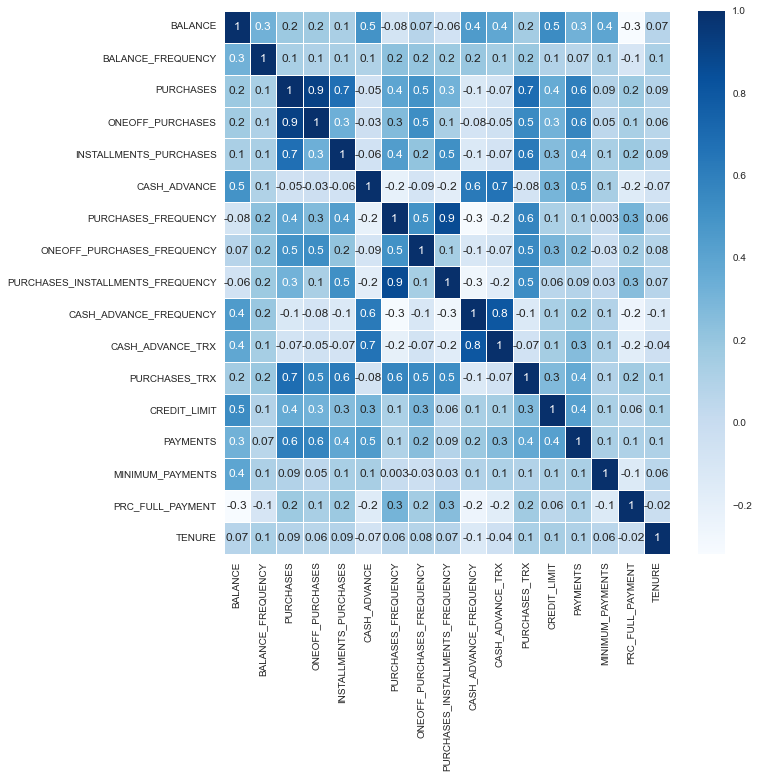

In [48]:
corr_cc_data = credit_card_data.corr()

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_cc_data, annot=True, cmap="Blues", fmt='.1g', linewidths=.5, ax = ax)

In [105]:
from sklearn.metrics.cluster import normalized_mutual_info_score

y = km.fit_predict(cc_data_scaled)
normalized_mutual_info_score(km_data["BALANCE_FREQUENCY"], km_data["KMeans Segment"])

D:\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


0.049146668096302644

In [103]:
from sklearn.metrics.cluster import rand_score

rand_score(y, km_data["KMeans Segment"])

0.9983493052811369

<AxesSubplot:xlabel='BALANCE', ylabel='PURCHASES'>

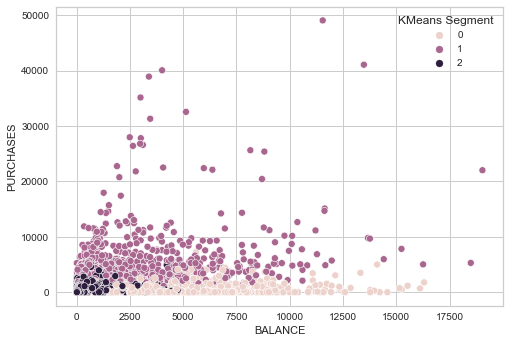

In [147]:
sns.scatterplot(x=km_data["BALANCE"], y=km_data["PURCHASES"], hue=km_data["KMeans Segment"])

In [227]:
km = KMeans(n_clusters = 3)
km.fit(cc_data_scaled)

KMeans(n_clusters=3)

<AxesSubplot:xlabel='ONEOFF_PURCHASES_FREQUENCY', ylabel='Density'>

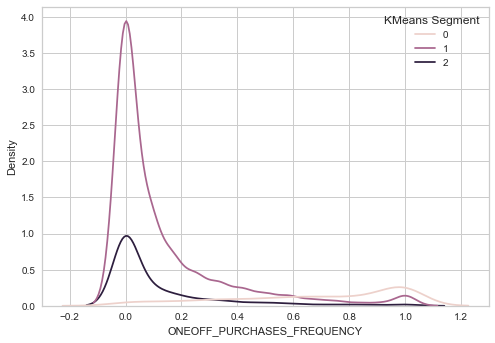

In [228]:

km_data = credit_card_data.copy()
km_data['KMeans Segment'] = km.labels_
km_data['KMeans Segment']

sns.kdeplot(data=km_data, x=km_data["ONEOFF_PURCHASES_FREQUENCY"], hue=km_data["KMeans Segment"])

<AxesSubplot:xlabel='CASH_ADVANCE_FREQUENCY', ylabel='Density'>

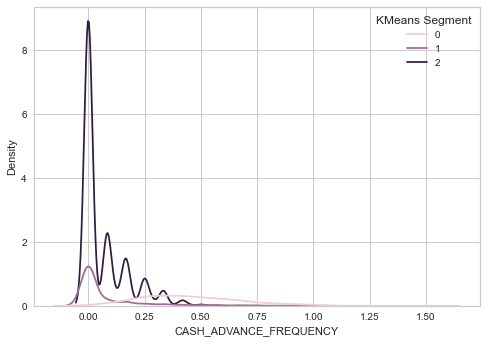

In [217]:
sns.kdeplot(data=km_data, x=km_data["CASH_ADVANCE_FREQUENCY"], hue=km_data["KMeans Segment"])

In [164]:
cc_data_clust_

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
KMeans Segment,,,,,,,,,,,,,,,,,
0,3990.338850,0.958059,386.761982,248.930119,137.909206,3866.619281,0.233626,0.110995,0.145639,0.446911,12.380863,5.650407,6687.713912,3015.252697,1794.408088,0.033711,11.352095
1,2215.220739,0.981447,4271.967762,2721.404972,1551.049408,455.728015,0.949145,0.668979,0.744440,0.062710,1.518248,56.522303,7728.142741,4156.232548,1224.418364,0.299116,11.922952
2,799.302176,0.835161,505.543413,253.151827,252.712435,329.561880,0.464984,0.132341,0.345038,0.068259,1.210853,8.650866,3269.510957,909.711291,548.493328,0.155775,11.478751


<AxesSubplot:xlabel='CASH_ADVANCE_FREQUENCY', ylabel='Density'>

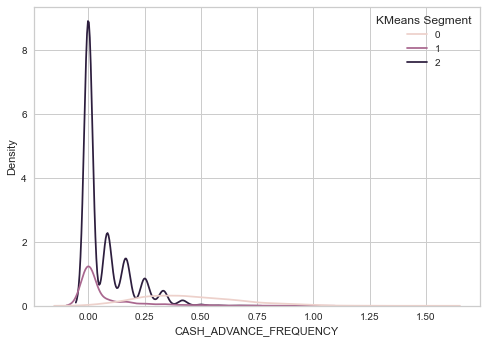

In [156]:
sns.set_style('whitegrid')
sns.kdeplot(x=km_data["CASH_ADVANCE_FREQUENCY"], hue=km_data["KMeans Segment"])

In [ ]:
"""
If BALANCE is low and PURCHASES is high ➡ Class 0 (Dreamers ✨)
If BALANCE is low and PURCHASES is low ➡ Class 1 (Economicals 💲)
If BALANCE is high and PURCHASES is high ➡ Class 2 (Bourgeoisie 🛍️)
If BALANCE is high and PURCHASES is low ➡ Class 3 (The Mafia 🕶️)
"""